In [2]:
#For data pre-processing and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

#For Model Development
from sklearn.model_selection import train_test_split

#### Data pre-processing

In [3]:
od = pd.read_csv("A:\\Additional\\riceclassification.csv")

In [4]:
od.shape

(18185, 12)

In [5]:
od.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990,77.417073,50.954344,0.752861,3080,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556,84.323564,55.413061,0.753762,3636,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719,106.721142,68.977700,0.763053,5819,85.332625,0.754983,281.839,0.904748,1.547183,1


In [6]:
od.dtypes

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [7]:
od.duplicated().sum()

0

In [8]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


#### Inference:
1. Data has 18185 rows and 12 columns.
2. Data has no null values.
3. Data has no duplicates.
4. we have no categorical data as well.
5. WE have a unrequired column as id.<br>
<b>Not much of my time will be spent on cleaning data :)<b>

In [9]:
od.drop(columns =["id"],inplace =True)

### Univariate Analysis

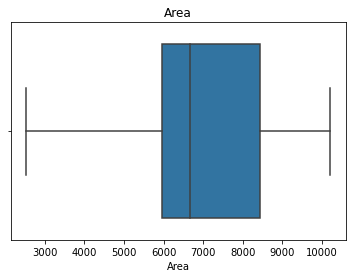

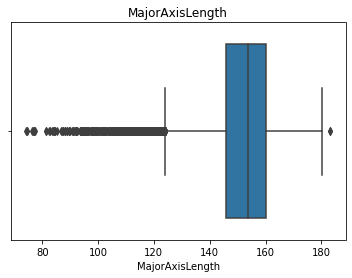

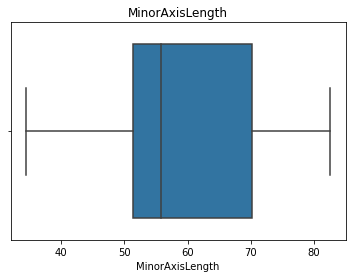

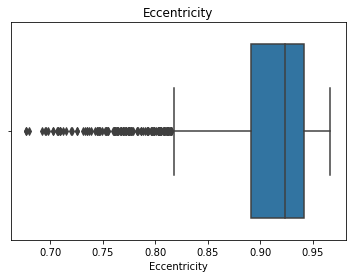

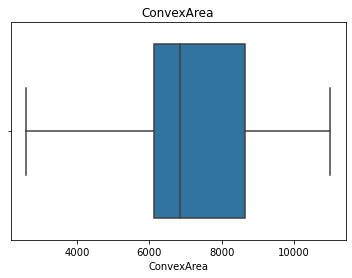

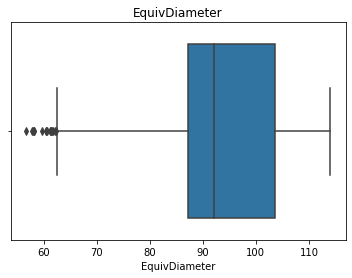

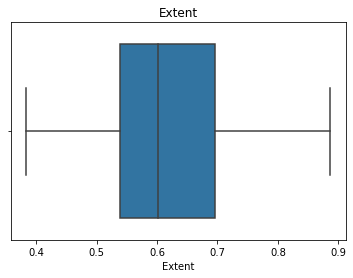

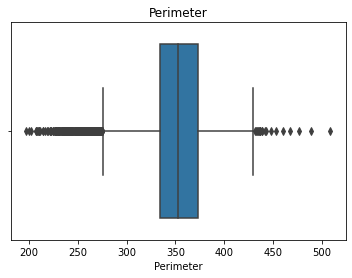

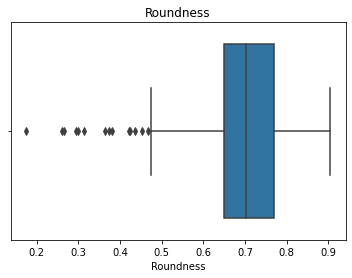

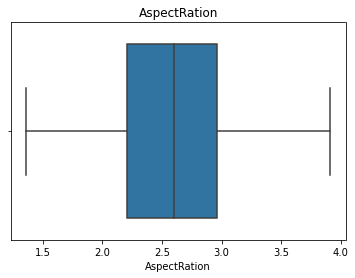

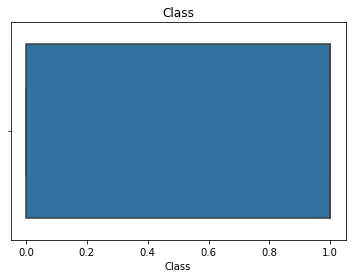

In [10]:
for i in od:
    sns.boxplot(x=od[i])
    plt.title(i)
    plt.show()

#### Inference:
Outlier Detection:<br>
    a.Upper limit = MajorAxisLength,perimeter<br>
    b.lower limit = MajorAxisLength,Eccentricity,EquivDiameter,Perimeter,Roundness</br>
  
Distribution:
    a.The IQR of Area is between 60000 to 85000.<br>
    b.The IQR of MajorAxisLength is between 123 to 161.<br>
    c.The IQR of MinorAxisLength is between 51 to 70.<br>
    d.The IQR of Eccentricity is between 0.88 to 0.93.<br>
    e.The IQR of ConvexArea is between 60000 to 85000.<br>
    f.The IQR of EqivDiameter is between 87 to 103.<br>
    g.The IQR of Extent is between 0.53 to 0.7.<br>
    h.The IQR of perimeter is between 340 to 365.<br>
    i.The IQR of Roundness is between 0.65 to 0.77.<br>
    j.The IQR of AspectRatio is between 2.2 to 3.0.    

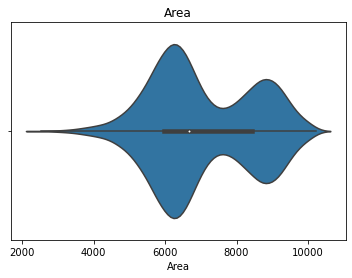

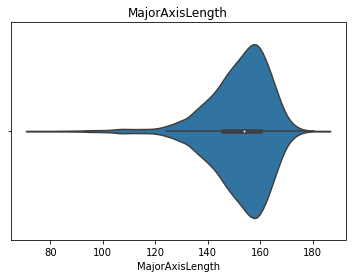

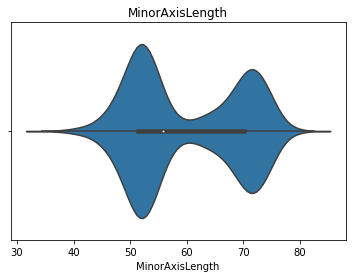

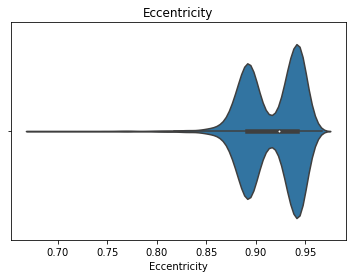

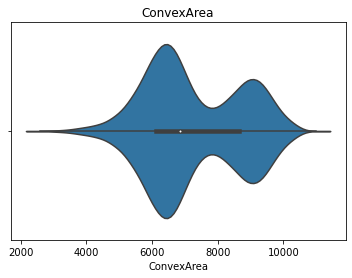

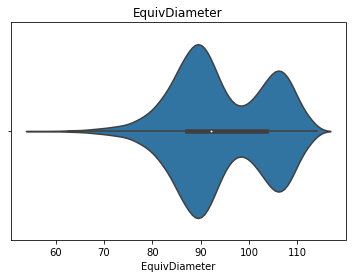

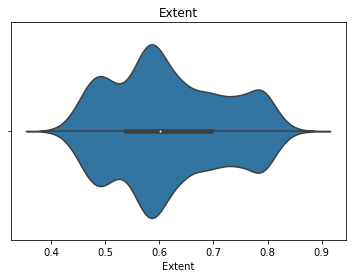

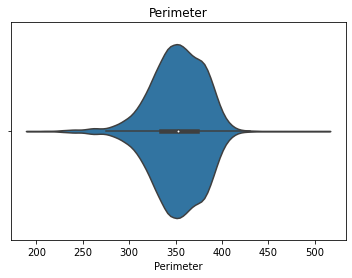

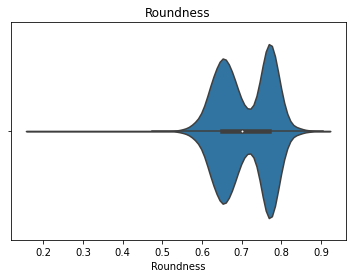

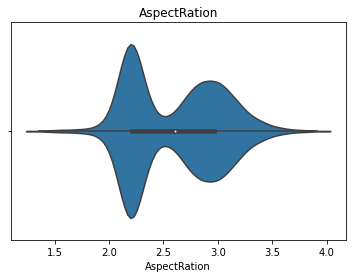

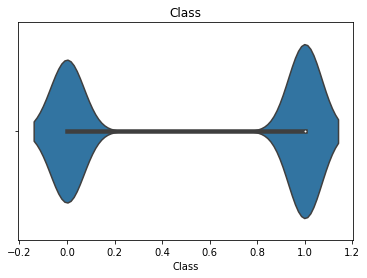

In [11]:
for i in od:
    sns.violinplot(x=od[i])
    plt.title(i)
    plt.show()

In [12]:
od.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Area,18185.0,7036.492989,1467.197150,2522.000000,3992.000000,4392.680000,4640.520000,4796.360000,4938.000000,5350.000000,5962.000000,6660.000000,8423.000000,9128.000000,9418.800000,9505.640000,9601.000000,9728.320000,9914.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,106.850500,117.396441,124.387241,127.728759,129.918782,136.596982,145.675910,153.883750,160.056214,164.684175,167.140715,167.828000,168.660308,169.844925,171.727573,183.211434
MinorAxisLength,18185.0,59.807851,10.061653,34.409894,42.443455,44.279059,45.234774,46.043351,46.656608,48.542207,51.393151,55.724288,70.156593,73.386511,74.785355,75.167938,75.659920,76.228048,77.182513,82.550762
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.832269,0.857005,0.865566,0.870267,0.873018,0.880517,0.891617,0.923259,0.941372,0.948816,0.952600,0.953759,0.955175,0.956589,0.959322,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,4108.840000,4513.360000,4779.000000,4932.360000,5082.000000,5501.000000,6125.000000,6843.000000,8645.000000,9365.000000,9673.000000,9756.640000,9857.480000,9993.000000,10180.160000,11008.000000
EquivDiameter,18185.0,94.132952,9.906250,56.666658,71.293564,74.785920,76.866726,78.146754,79.292225,82.533821,87.126656,92.085696,103.559146,107.805986,109.509765,110.013439,110.563886,111.294572,112.351666,114.016559
Extent,18185.0,0.616653,0.104389,0.383239,0.434341,0.445237,0.452617,0.458120,0.462737,0.481419,0.538530,0.601194,0.695664,0.776355,0.796994,0.802388,0.808064,0.815235,0.826007,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,261.085000,282.017240,291.698040,297.536480,302.131600,315.568200,333.990000,353.088000,373.003000,387.127000,393.979600,396.124120,398.471840,401.740000,407.356000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.575954,0.589445,0.598064,0.604111,0.608609,0.623741,0.650962,0.701941,0.769280,0.789725,0.801002,0.804611,0.808735,0.815023,0.828113,0.904748
AspectRation,18185.0,2.599081,0.434836,1.358128,1.803845,1.940585,1.996827,2.030128,2.050491,2.109637,2.208527,2.602966,2.964101,3.166255,3.287018,3.326994,3.377884,3.431244,3.542145,3.911845


#### Inference:
1.Seeing the standard Deviation and Mean we can say that the data is reliable.<br>
2.Outliers of the boxplot can be verified from here.

### Bivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


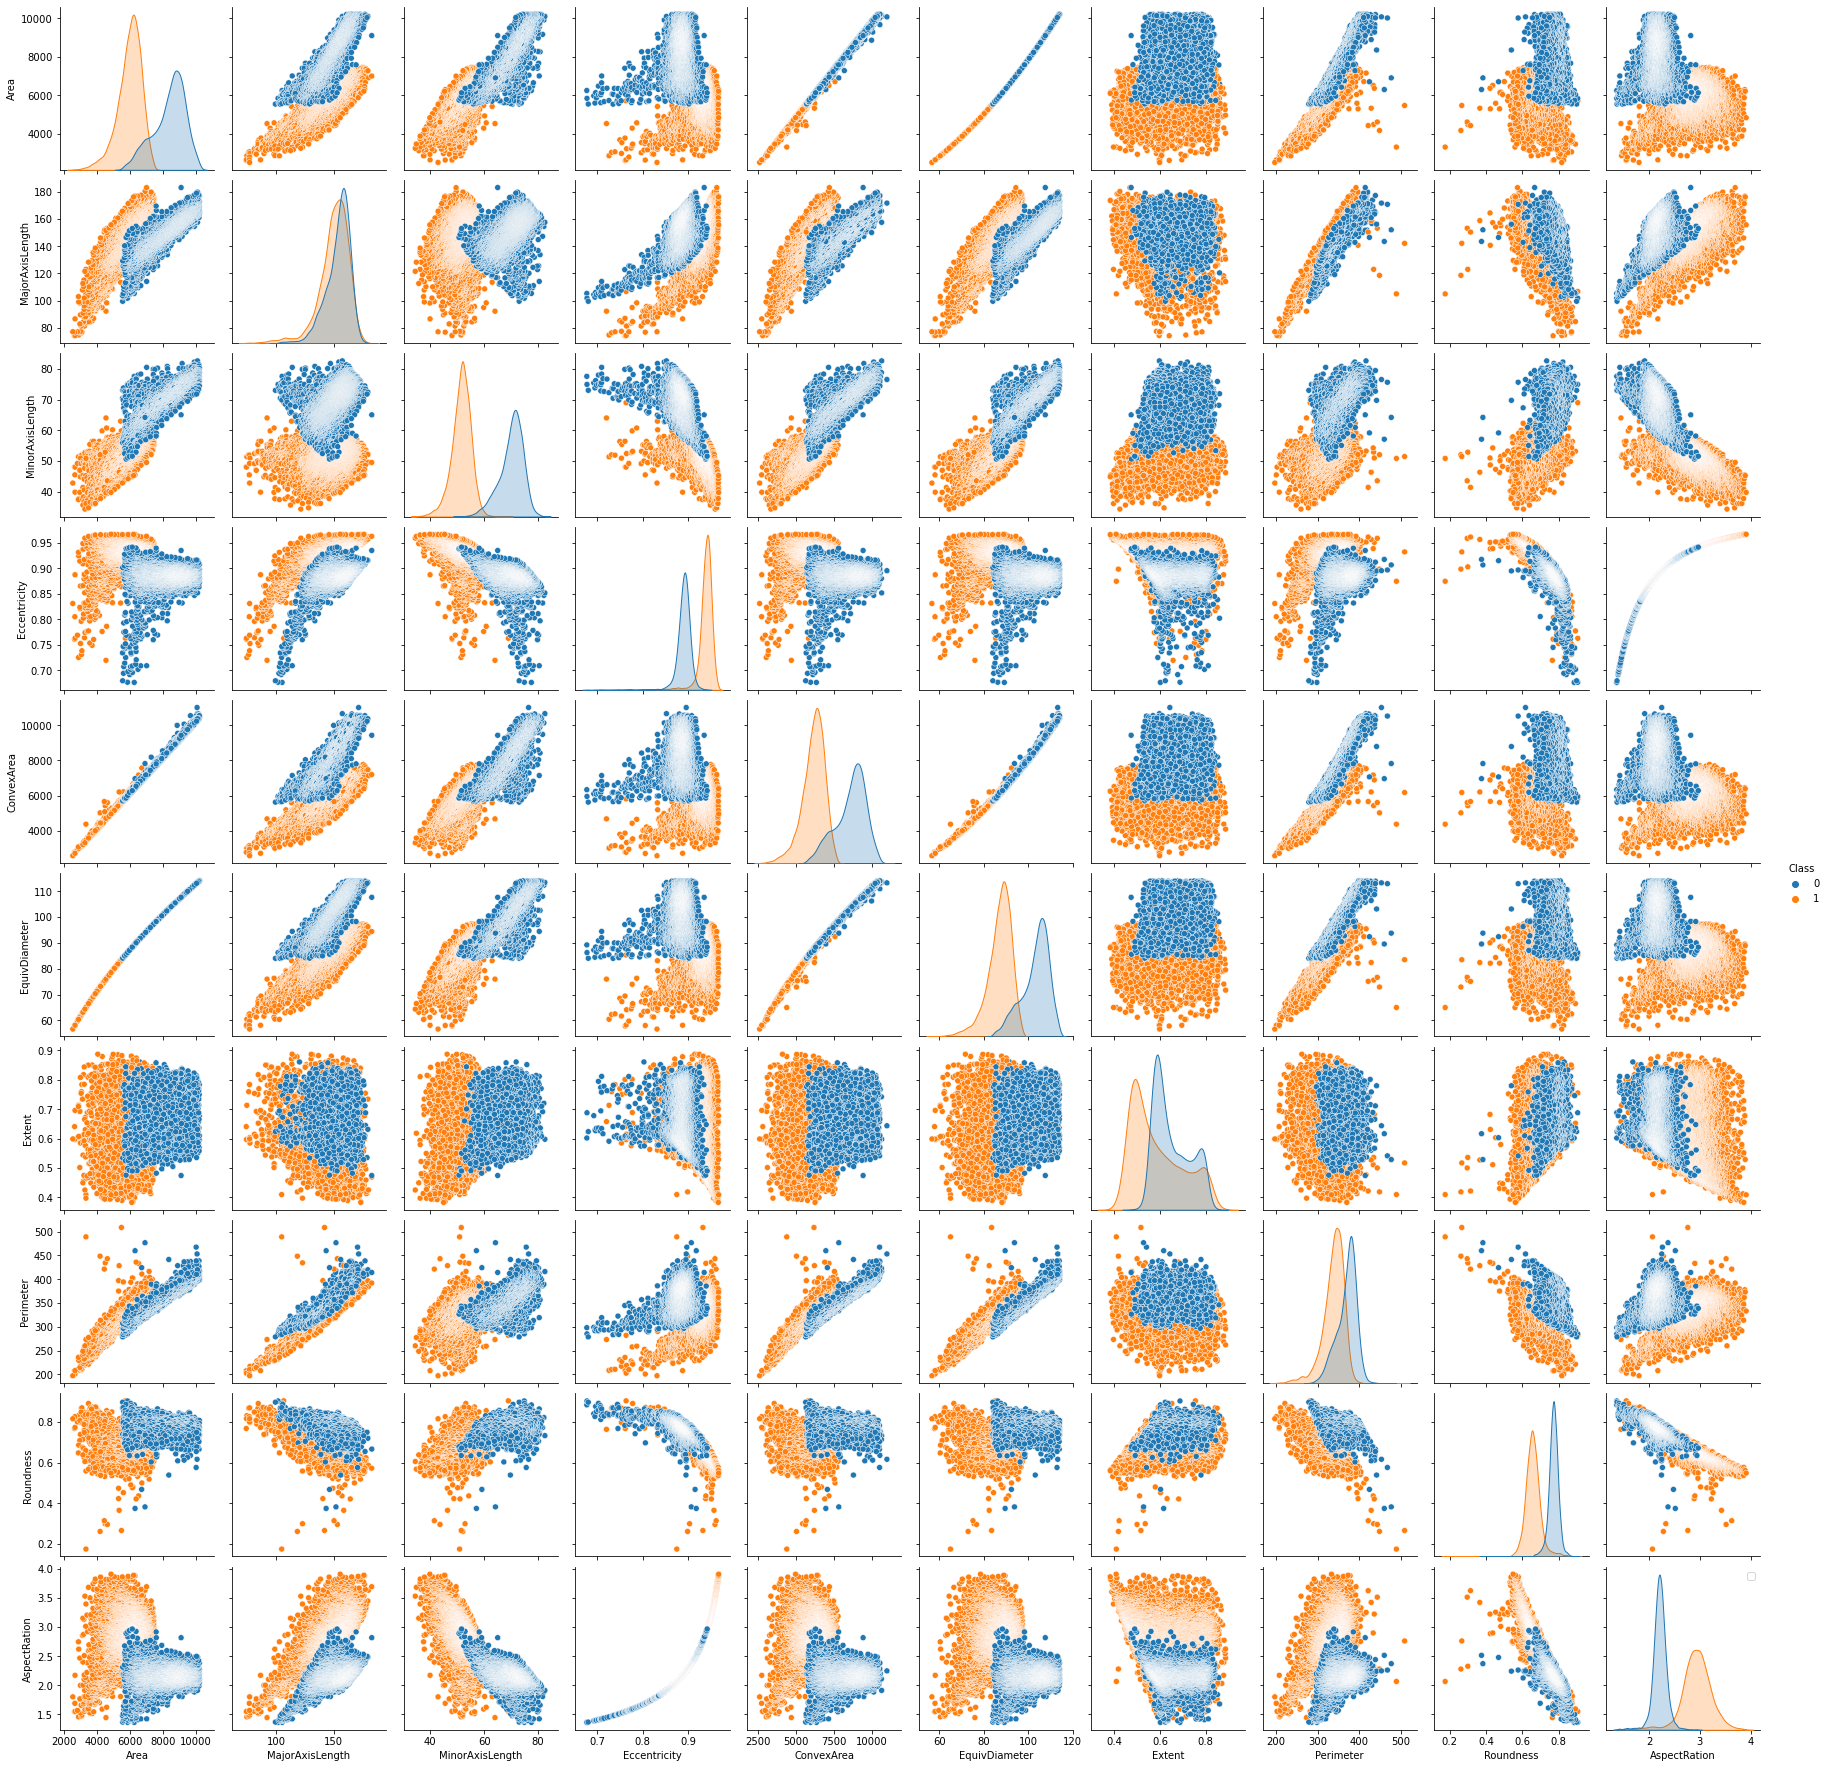

In [19]:
sns.pairplot(data=od,hue='Class')
plt.show()

#### Inferene:
1.Area has a positive relation with MajorAxisLength and for a higher value of both the rice will be classified as type 0 and 
for a lower value of both it will be classified as 1.<br>
2.Area has a positive relation with MinorityAxisLength and for a higher value of both the rice is likely to classified as type 0
and for a lower value it is likely to classified as type 1.<br>
3.Area and ConvexArea are in a positive relation.For a area greater than 6000 and a convex area greater than 52000 the rice is
likely to be classified as type 0.<br>
4.Area and parimeter are in a positive relation and for a higher value of both the rice is likely to be classified as type 0.<br>
5.MajorityAxisLength and perimeter are in a positive relation.<br>
6.MajorityAxisLength and Roundness are in Negatie Relation.<br>
7.MinorAxisLegth has a negative relation with eccentricity for a lower value of MinorAxis and eccentricity the rice is 
likely to be classified as type 0<br>
8.MinorAxisLength and Convex Area are in a positive Relation for a higher value of both the rice is likely to be classified as type 0.<br>
9.MinorAxis and EquivDiameter are in a positive Relation for a higher value of both the rice is likely to be classified as type 0.<br>
10.MinorAxis and AspectRatio are in negative relation with each other.<br>
11.ConvexArea is in positive Relation with EquivDiameter and for a value of convex greater than 6000 and Equivdiameter greater 
than 90 the rice is likely to be classified as type 0.<br>
12.ConvexArea and parimeter are in a negative relation.<br>
13.EquivDiameter and Perimeter are in a positive relation.<br>
14.Roundness and AspectRatio are in a negative Relation.

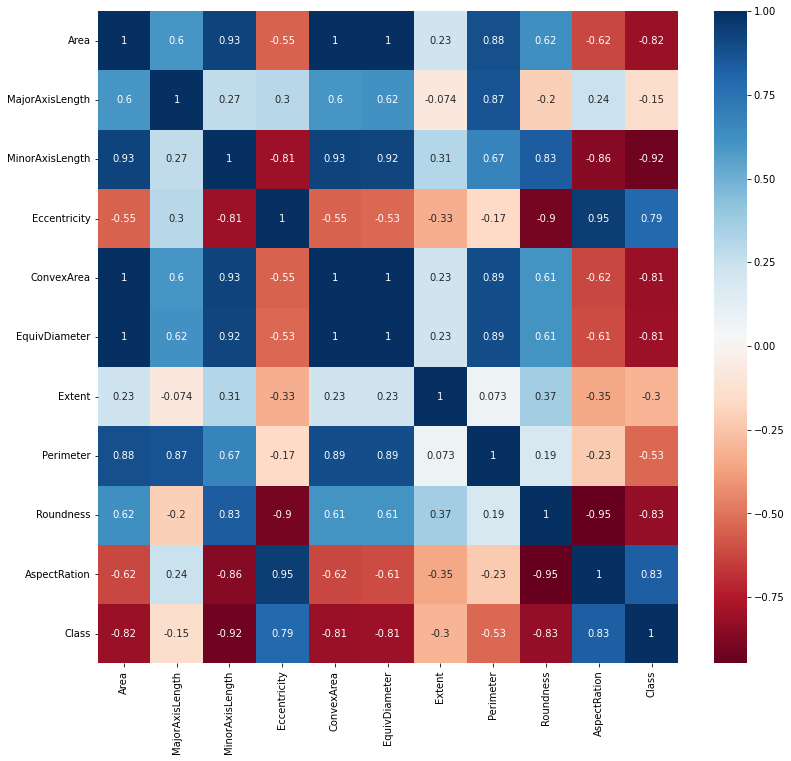

In [16]:
plt.figure(figsize=(13,12))
corr= od.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Inference:
1.Area have V.high correlation with MajorAxisLength, ConvexArea, EquivDiameter,perimeter and class.<br>
2.MajorAxisLength has v.high correlation with perimeter.<br>
3.MinorAxisLength has V.highCorrelation with ConvexArea, EquivDiameter, Roundness,AspectRatio,class.<br>
4.Eccentricity has v.highcorrelation with Roundness,AspectRatio,Class.<br>
5.ConvexArea has v.highCorrelation withEquivDiameter,Perimeter,Class.<br>
6.EquivDiameter has V.highCorrelation with perimeter and Class.<br>
7.Roundness has V.highCorrelation with AspectRatio and Class.<br>
8.AspectRatio has V.highCorrealtion with Class.<br>

->Area has correlation with almost every variable and target variable as well.<br>
->MinorAxisLength has correlation with almost every variable and target variable as well.<br>
->Eccentricity has high correlation with 2 variables and target variable.<br>

#### Pre-Model Phase
1.Data has no duplicates.<br>
2.Data has no categorical Data.<br>
3.Data has no missing Values.

##### 4.Outlier-Treatment

In [68]:
cd = od.copy()

Outlier Detection:<br>
    a.Upper limit = MajorAxisLength,perimeter<br>
    b.lower limit = MajorAxisLength,Eccentricity,EquivDiameter,Perimeter,Roundness</br>

In [45]:
cd.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
Area,18185.0,7036.492989,1467.197150,2522.000000,3992.000000,4392.680000,4640.520000,6660.000000,9601.000000,9728.320000,9914.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,106.850500,117.396441,124.387241,153.883750,168.660308,169.844925,171.727573,183.211434
MinorAxisLength,18185.0,59.807851,10.061653,34.409894,42.443455,44.279059,45.234774,55.724288,75.659920,76.228048,77.182513,82.550762
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.832269,0.857005,0.865566,0.923259,0.955175,0.956589,0.959322,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,4108.840000,4513.360000,4779.000000,6843.000000,9857.480000,9993.000000,10180.160000,11008.000000
EquivDiameter,18185.0,94.132952,9.906250,56.666658,71.293564,74.785920,76.866726,92.085696,110.563886,111.294572,112.351666,114.016559
Extent,18185.0,0.616653,0.104389,0.383239,0.434341,0.445237,0.452617,0.601194,0.808064,0.815235,0.826007,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,261.085000,282.017240,291.698040,353.088000,398.471840,401.740000,407.356000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.575954,0.589445,0.598064,0.701941,0.808735,0.815023,0.828113,0.904748
AspectRation,18185.0,2.599081,0.434836,1.358128,1.803845,1.940585,1.996827,2.602966,3.377884,3.431244,3.542145,3.911845


In [70]:
cd["MajorAxisLength"] = cd["MajorAxisLength"].clip(upper=cd["MajorAxisLength"].quantile(0.98))
cd["Perimeter"] = cd["Perimeter"].clip(upper=cd["Perimeter"].quantile(0.98))

In [71]:
cd["MajorAxisLength"] = cd["MajorAxisLength"].clip(lower=cd["MajorAxisLength"].quantile(0.1))
cd["Eccentricity"] = cd["Eccentricity"].clip(lower=cd["Eccentricity"].quantile(0.1))
cd["EquivDiameter"] = cd["EquivDiameter"].clip(lower=cd["EquivDiameter"].quantile(0.1))
cd["Perimeter"] = cd["Perimeter"].clip(lower=cd["Perimeter"].quantile(0.1))
cd["Roundness"] = cd["Roundness"].clip(lower=cd["Roundness"].quantile(0.1))

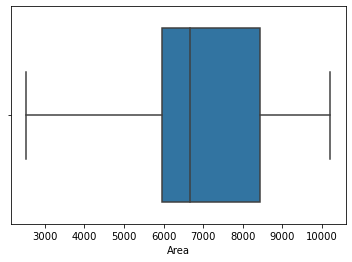

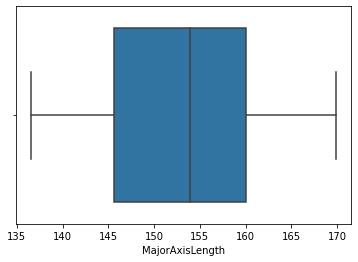

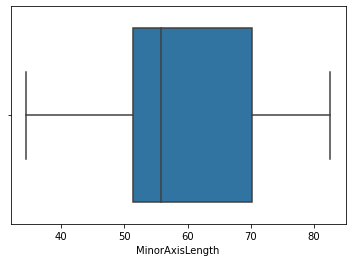

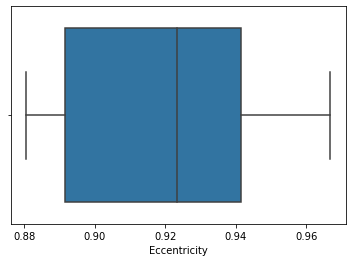

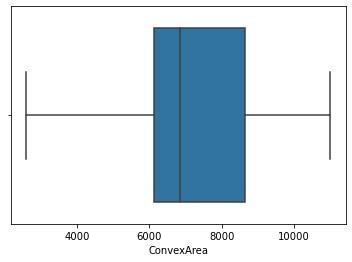

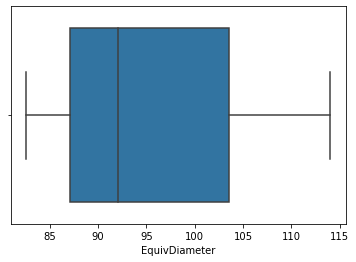

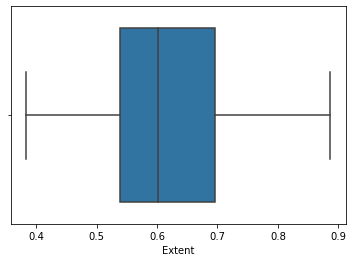

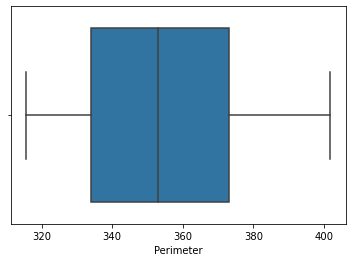

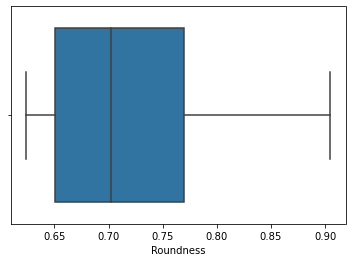

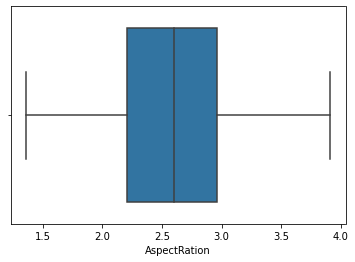

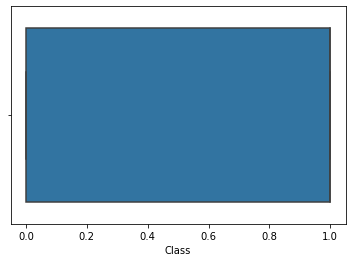

In [48]:
for i in cd:
    sns.boxplot(x=cd[i])
    plt.show()

#### Outliers Treated

### 5.Feature Selection

In [72]:
x = cd.drop(columns = ["Class"],axis = 1)
y = cd['Class']
print(x.shape)
print(y.shape)

(18185, 10)
(18185,)


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [73]:
imp=pd.DataFrame({"var":x.columns,"imp":rf.feature_importances_}).sort_values(by=["imp"],ascending=False)
imp

,var,imp
2,MinorAxisLength,0.290745
9,AspectRation,0.231918
3,Eccentricity,0.183091
8,Roundness,0.139877
5,EquivDiameter,0.052654
0,Area,0.042940
4,ConvexArea,0.042293
7,Perimeter,0.007068
1,MajorAxisLength,0.005392
6,Extent,0.004023


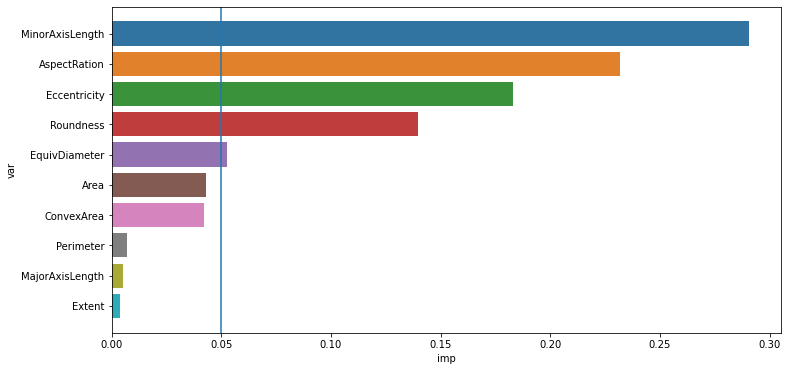

In [58]:
plt.figure(figsize = (12,6))
sns.barplot(x = "imp",y="var",data = imp)
plt.axvline(x = 0.05)
plt.plot()
plt.show()

In [60]:
selected_var=imp[imp["imp"]>=0.05]["var"].to_list()         #important variable selection so to ease in prediction
selected_var

['MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'Roundness',
 'EquivDiameter']

In [61]:
sf=cd[['MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'Roundness',
 'EquivDiameter']]
sf.shape

(18185, 5)

In [62]:
sf

,MinorAxisLength,AspectRation,Eccentricity,Roundness,EquivDiameter
0,64.012769,1.440796,0.880517,0.764510,82.533821
1,51.400454,1.453137,0.880517,0.831658,82.533821
2,52.043491,1.465950,0.880517,0.868434,82.533821
3,51.928487,1.483456,0.880517,0.870203,82.533821
4,56.374021,1.510000,0.880517,0.874743,82.533821
...,...,...,...,...,...
18180,51.029281,2.912535,0.939210,0.663444,86.326537
18181,58.141659,2.916910,0.939398,0.641362,98.272692
18182,52.908085,2.925396,0.939760,0.682832,90.023162
18183,51.474600,2.941216,0.940427,0.635227,87.112041


In [75]:
#### Imbalanced Dataset

In [65]:
from collections import Counter

In [74]:
count = Counter(y)
print(count)

Counter({1: 9985, 0: 8200})


Inference:
    Data is not that imbalanced

### Model Development

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
x_train,x_test,y_train,y_test=train_test_split(sf,y,test_size=0.25,
                                               random_state=2,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape) 

(13638, 5)
(4547, 5)
(13638,)


In [78]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [79]:
ypred = log.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics

In [84]:
# Confusion metrics
pd.DataFrame(metrics.confusion_matrix(y_test, ypred), 
             columns=["Pred_0", "Pred_1"],
            index=["Act_0", "Act_1"])

,Pred_0,Pred_1
Act_0,2027,38
Act_1,20,2462


<b>TP = 2462,TN = 2027,FN = 20,FP = 38</b> 

In [85]:
acc = accuracy_score(y_test,ypred)
pre = precision_score(y_test,ypred)
rec = recall_score(y_test,ypred)

In [98]:
print('Accuracy:',acc,'Recall:',rec,'Precision:',pre)

Accuracy: 0.9872443369254453 Recall: 0.991941982272361 Precision: 0.9848


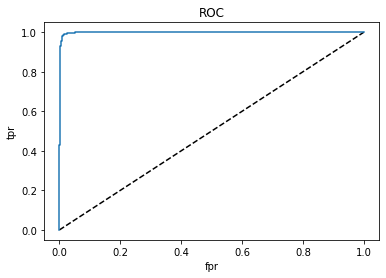

In [99]:
# ROC : Reciever Operator characteristics 
probs=log.predict_proba(x_test)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_test,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logisticRegression')
plt.title("ROC")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [100]:
log.coef_

array([[-1.09114325, -0.73053693,  0.09720068, -2.86161056,  0.24272624]])

In [101]:
x_train.columns

Index(['MinorAxisLength', 'AspectRation', 'Eccentricity', 'Roundness',
       'EquivDiameter'],
      dtype='object')

In [103]:
log.intercept_

array([45.9973381])

In [116]:
def rice_classification():
    mal = float(input("Enter MinorAxisLength:"))
    ar = float(input("Enter AspectRatio:"))
    ec = float(input("Enter Eccentricity:"))
    ro = float(input("Enter Roundness:"))
    eq = float(input("Enter EquivDiameter:"))
    z  = mal*(-1.09114325)+ar*(-0.73053693)+ec*(0.09720068)+ro*(-2.86161056)+eq*(0.24272624)+45.9973381
    p = np.exp(z)/(1+np.exp(z))
    if p<0.5:
        print("The Rice belongs to:Class 0")
    else:
        print("The Rice belongs to:Class 1")
                    

In [ ]:
64.01276874
1.440795615
0.7199162256
0.7645096145
76.00452496

In [117]:
rice_classification()

Enter MinorAxisLength:64.01276874
Enter AspectRatio:1.440795615
Enter Eccentricity:0.7199162256
Enter Roundness:0.7645096145
Enter EquivDiameter:76.00452496
The Rice belongs to:Class 0
